## QSF - Exploratory Analysis

**QSF abbrev. for  Qualitative Semester Feedback**

Requires python >= 3.9.7

```bash
pip install pandas langid txtai sacremoses sentencepiece langchain nltk
```

before getting started, install ollama

```bash
curl https://ollama.ai/install.sh | sh
ollama run llama2
```

For increased reproducebility utilize modelfile in project
to build model with fixed seed and 0 temperature.

```bash
curl https://ollama.ai/install.sh | sh
ollama create bodeby/qsf -f ./modelfile
ollama run bodeby/qsf # QSF
```

In [88]:
# installation of required packages
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


## Global Variables and Settings

In [89]:
write_results_to_file = False       # self-explanatory
translate_text_txtai = False        # toggle txtai translations
max_token_context_length = 2000     # size of context
ollama_model = "bodeby/qsf"         # language model (paramter tuned)
file_path = 'data/actionable.csv'   # input data

In [90]:
# Package imports
import pandas as pd
import matplotlib.pyplot as plt

# Shared functions between notebooks
from lib.shared import process_data, translate_text

### Pre-preprocessing

In [133]:
# load CSV from file
df = pd.read_csv(file_path, sep='\t',encoding='utf-16')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 63 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   Peg på ting, der fungerede godt, og giv forslag til, hvordan de ville kunne fungere endnu bedre                    111 non-null    object 
 1   Peg på ting, som fungerede mindre godt, og giv forslag til, hvordan de ville kunne bringes til at fungere godt     114 non-null    object 
 2   Evt. supplerende bemærkninger                                                                                      45 non-null     object 
 3   Peg på ting, der fungerede godt, og giv forslag til, hvordan de ville kunne fungere endnu bedre.1                  100 non-null    object 
 4   Peg på ting, som fungerede

In [136]:
# See the amount of reponses for each course
course_dist = df['Kurser'].value_counts()

In [137]:
course_dist

Kurser
Entrepreneurskab                               67
Datalogiens teoretiske grundlag                43
Agil Software Engineering                      35
Design og evaluering af brugergrÃ¦nseflader    31
Grundlæggende programmering                    25
Dataintensive systemer (valgfag)               16
Databaseudvikling                               8
Algoritmik og datastruktur                      6
Machine Intelligence                            5
Interaktionsdesign 5: Kvalitativ metode         5
Forretningsprocesser og IT-Projekter            5
Distributed Systems                             5
Indledende programmering for datavidenskab      3
Imperativ programmering                         3
Databasesystemer                                2
Test kursus 1                                   1
Name: count, dtype: int64

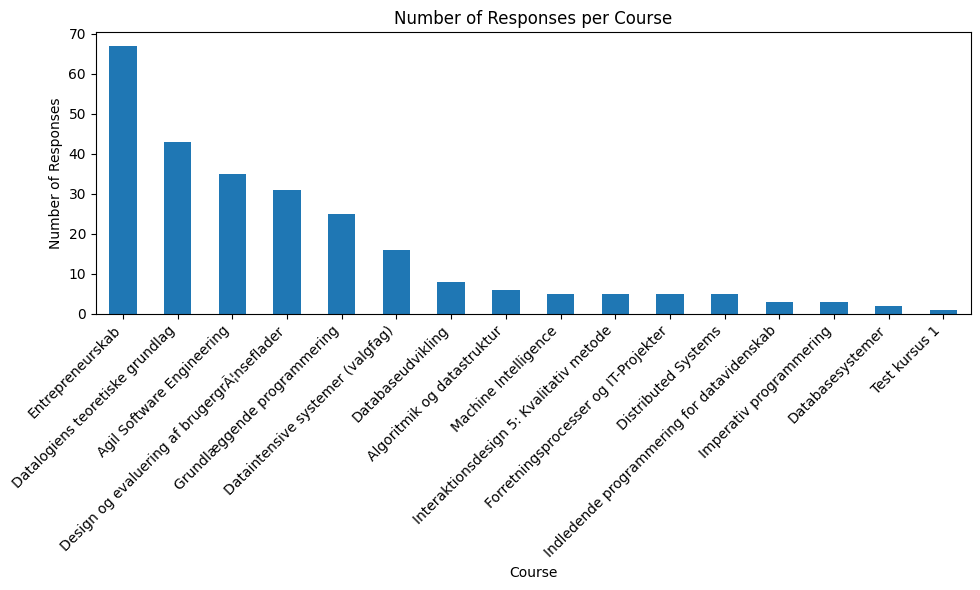

In [138]:
# Plot the values as a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
course_dist.plot(kind='bar')  # Plotting as a bar chart
plt.title('Number of Responses per Course')  # Set the title
plt.xlabel('Course')  # Set the x-axis label
plt.ylabel('Number of Responses')  # Set the y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot

### Post preprocessing

In [139]:
# Apply Preprocessing to data
df = process_data(df, translate_text_txtai, write_results_to_file)

In [140]:
df.head()

,Campus,Semester,Course,Feedback_good,Feedback_bad,Feedback_extra
0,Aalborg,9,IT-ret,Alle undervisere var rigtig gode og engageret ...,Fire timers forelæsning i træk er meget lang t...,NaN
1,Aalborg,9,Specialiseringskursus i programmeringsteknologi,Vi nåede alle at lave tre fremlæggelser i løbe...,"Holdet var opdelt på en måde, så fremlæggelser...",Kurset fungerede fint selvom det var online.
2,Aalborg,9,Project,Vejledere er engageret og gode til at give fee...,NaN,NaN
3,Aalborg,9,Semester,Godt samspil mellem specialiseringskurset og p...,NaN,NaN
4,Aalborg,9,Studiemiljø,Vi er glade for at have vores eget grupperum!,Bedre køkkenfaciliteter i FRB 7 G (fx mikroovn...,De fleste grupperum på FRB 7 G står tomme/bliv...


In [141]:
# See the amount of reponses for each course
course_dist = df['Course'].value_counts()

In [142]:
course_dist

Course
Project                                                                             124
Studiemiljø                                                                         119
Semester                                                                            116
Problembaseret læring                                                                41
Imperativ programmering                                                              37
Datalogiens teoretiske grundlag                                                      35
Systemudvikling                                                                      21
Objektorienteret programmering                                                       21
Design og evaluering af brugergrÃ¦nseflader                                          21
Databasesystemer                                                                     19
Agil Software Engineering                                                            17
Maskinintelligens        

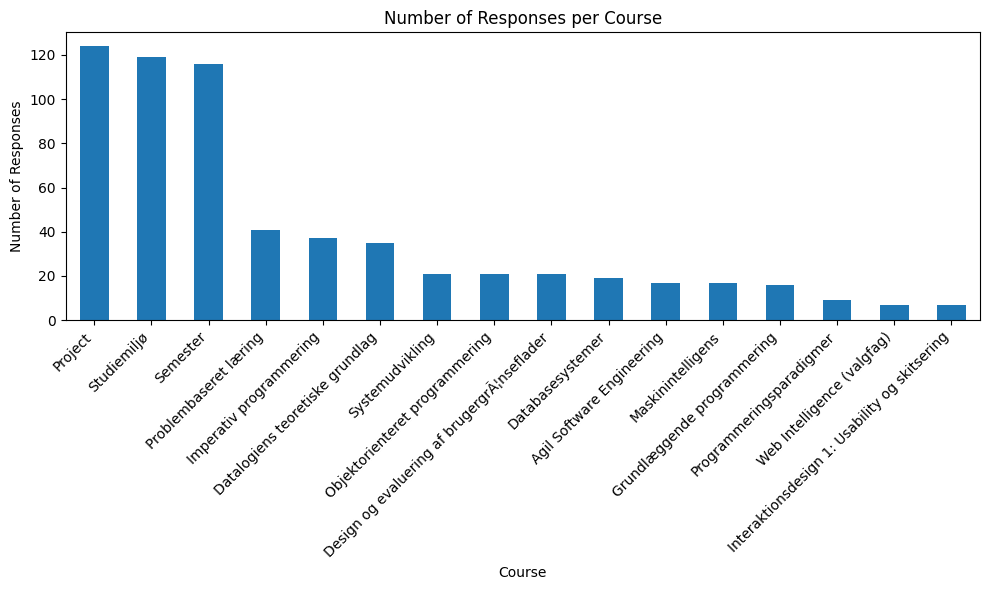

In [143]:
lim_df = course_dist.iloc[0:16] # lim. amount of courses to plot

# Plot the values as a bar chart (top-16)
plt.figure(figsize=(10, 6))  # Set the figure size
lim_df.plot(kind='bar')  # Plotting as a bar chart
plt.title('Number of Responses per Course')  # Set the title
plt.xlabel('Course')  # Set the x-axis label
plt.ylabel('Number of Responses')  # Set the y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot

## Dataset Exploration

To understand the collected data, we have defined the following Exploration Questions (EQ)

- EQ1: Which campus are the responses from?
- EQ2: What is the distribution in responses per semester?
- EQ3: What is the balance between postive, negative and additional feedback?

### EQ1: Campuses

In [105]:
df["Campus"].value_counts() # EQ1

Campus
Aalborg       726
Copenhagen     16
Name: count, dtype: int64

### EQ2: Semester

In [107]:
df["Semester"].value_counts() # EQ2

Semester
1    274
3    169
5    127
7    117
9     55
Name: count, dtype: int64

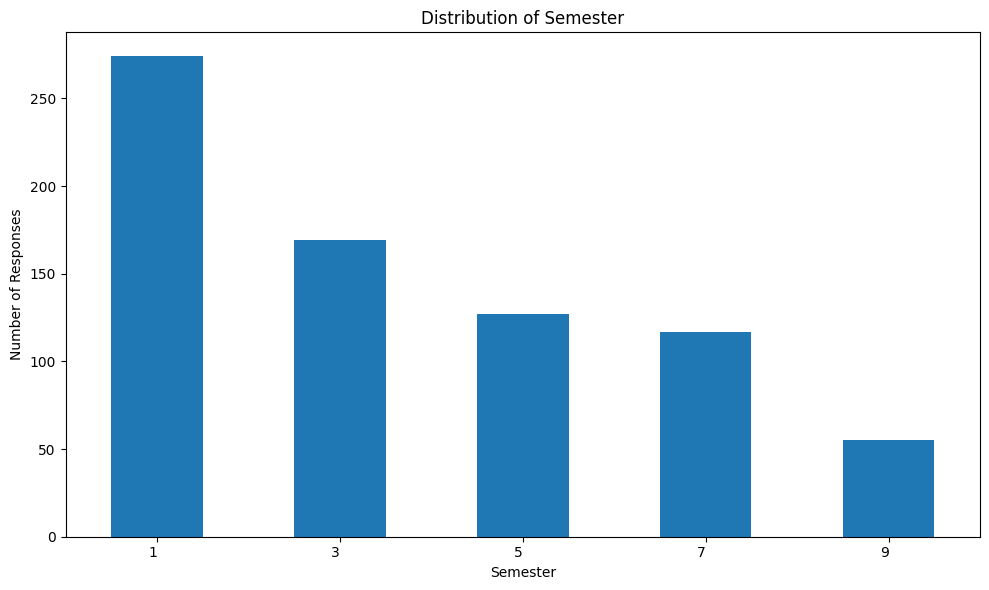

In [146]:
# Plot the values as a bar chart (top-16)
plt.figure(figsize=(10, 6))  # Set the figure size
df["Semester"].value_counts().plot(kind='bar')  # Plotting as a bar chart
plt.title('Distribution of Semester')  # Set the title
plt.xlabel('Semester')  # Set the x-axis label
plt.ylabel('Number of Responses')  # Set the y-axis label
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot

In [103]:
project_course_df = df[df["Course"] == "Project"]
project_course_df.head()

,Campus,Semester,Course,Feedback_good,Feedback_bad,Feedback_extra
2,Aalborg,9,Project,Vejledere er engageret og gode til at give fee...,NaN,NaN
7,Aalborg,9,Project,It is excellent.,NaN,NaN
12,Aalborg,9,Project,Det er gået fint nok.,NaN,Husk at tjekke om jeres ML modeller convergere...
16,Aalborg,9,Project,Synes at alt er fint,NaN,NaN
19,Aalborg,9,Project,God vejledning - God frihed - Spændende,Mangler compute ressourcer (vi har adgang til...,NaN


In [132]:
num_pos_total= len(df["Feedback_good"].dropna())
num_neg_total = len(df["Feedback_bad"].dropna())
num_ext_total = len(df["Feedback_extra"].dropna())

pos_pct = round((num_pos_total / df.shape[0]) * 100, 2)
neg_pct = round((num_neg_total / df.shape[0]) * 100, 2)
ext_pct = round((num_ext_total / df.shape[0]) * 100, 2)

print (f'Total sample size: {df.shape[0]}')
print(f'Num. Posistive: {num_pos_total}, which means {pos_pct}% contained postive feedback')
print(f'Num. Negative: {num_neg_total}, which means {neg_pct}% contained negative feedback')
print(f'Num. Extra: {num_ext_total}, which means {ext_pct}% contained additional feedback')

Total sample size: 742
Num. Posistive: 650, which means 87.6% contained postive feedback
Num. Negative: 652, which means 87.87% contained negative feedback
Num. Extra: 237, which means 31.94% contained additional feedback
